# Исследование продаж компьютерных игр 


В нашем распоряжении данные из открытых источников о продажах игр во всем мире.
Наша задача спрогнозировать для интернет-магазина продажи на следующий год.

# Шаг 1

Откроем фаил с данными и изучим общую информацию.

In [1]:
import pandas as pd# Импортирую нужные в работе библиотеки.

In [2]:
import numpy as np# Импортирую нужные в работе библиотеки.

In [3]:
import matplotlib.pyplot as plt# Импортирую нужные в работе библиотеки.

In [4]:
import seaborn as sns# Импортирую нужные в работе библиотеки.

In [5]:
from scipy import stats as st# Импортирую нужные в работе библиотеки.

In [6]:
data = pd.read_csv('/datasets/games.csv')# прочтем csv-файл

In [7]:
data.info()# Изучим общую информацию о полученном датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.head(20)# взглянем на первые 20 строчек 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Датасет состоит из 16715 строк. В столбцах 'Year_of_Release' и 'User_Score' лучше поменять тип данных. Сразу видно, что в столбцах 'Critic_Score', 'User_Score', 'Rating' много пропусков. Надо это исправить и проверить данные на наличие дубликатов.

# Шаг 2

Предподготовка данных.

In [9]:
data.columns = map(str.lower, data.columns)# преведем названия столбцов к нижнему регистру

In [10]:
data.isna().sum()# посмотрим количество пропущенных значений для каждого столбца

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
data = data.dropna(subset=['year_of_release'])# удалим 269 записи с неизвестным годом

In [12]:
data['year_of_release'] = data['year_of_release'].astype(int)# поменяем тип данных

In [13]:
data['user_score'].unique()# изучем оригинальные значения столбца

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data[data['user_score'] == 'tbd']# посмотрим на количество строк со значением tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2376 строки. Для коректности проведения исследований обязательно нужно поменять тип данных в этом столбце. Поэтому "tbd" оставить не можем. Поменять на значение NaN тоже не можем, тк при проверке гипотез pvalue будет равен Nan. В этой ситуации считаю оптимальным решением заменить все "tbd" на 0.

In [15]:
data['user_score'] = data['user_score'].replace('tbd', 0)

In [16]:
data['rating'] = data['rating'].fillna('unknown')# заменим пропуски на значение неизвестно

In [17]:
data['user_score'] = data['user_score'].fillna(0).astype(float)# заменим пропуски на ) и изменим тип данных

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']# добавим столбец с общими продажами

In [65]:
duplicate_data = data[data.duplicated()]
duplicate_data# проверим наши исходные данные на явные дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Дубликатов нет. В столбце с годом издания удалим все записи с пропусками, тк в нашем исследовании год выпуска имеет ключевое значение.
Пропуски в столбцах с именем и жанром можно оставить. Их количество минимально и они не повлият на результат исследования.
Пропуски и значения 'tbd' в столбце с оценкой пользователей заменим на 0 и поменям тип данных на float. Тип данных столбце 'critic_score' уже имеет нужное нам значение, поэтому его трогать не будем. Пропуски в столбце с возврастным рейтингом заменим на значение 'unknown' так будет лучше для дальнейших исследований.

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,unknown,31.38


# Шаг 3

Исследовательский анализ.

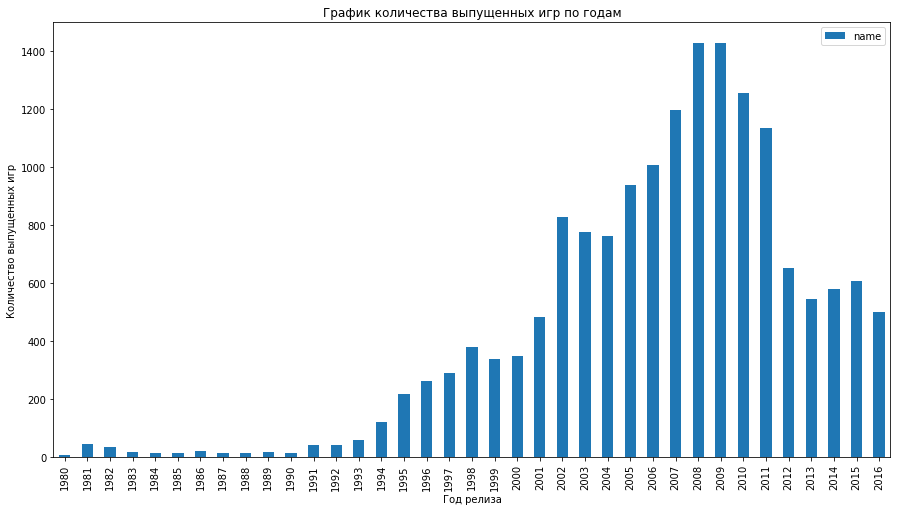

In [21]:
data.groupby(['year_of_release']).count().plot(kind='bar', y='name',  figsize=(15,8));
plt.title('График количества выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.show()

С 1980 по 1993 года количество выпущенных игр в общем объеме минимально. А начиная с 1994 года наблюдается всплеск и уверенный рост индустрии.Пик приходится на 2008 - 2009 года. С 2010 года наблюдается спад, видимо разработчики решили брать не колличеством, а качеством.

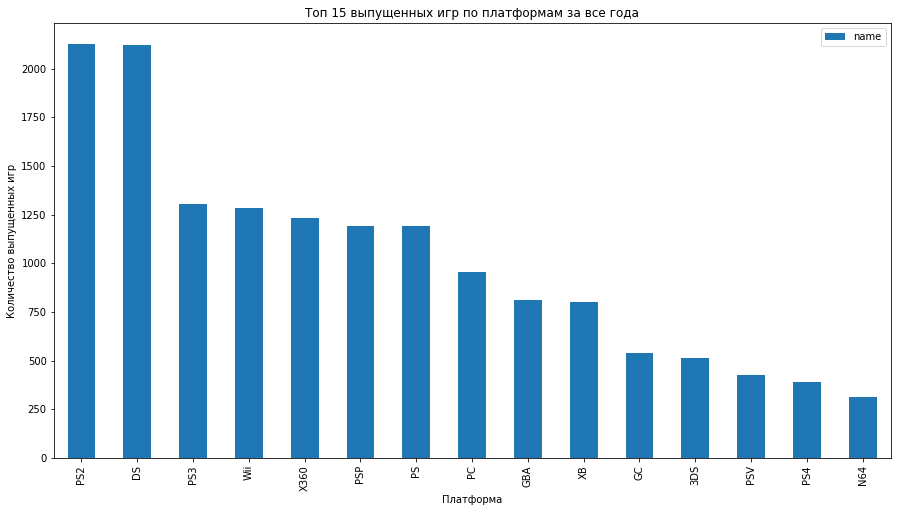

In [22]:
data_top = data.groupby(['platform']).count()
data_top = data_top.sort_values(by='name', ascending = False).head(15)
data_top.plot(kind='bar', y='name',  figsize=(15,8));
plt.title('Топ 15 выпущенных игр по платформам за все года')
plt.xlabel('Платформа')
plt.ylabel('Количество выпущенных игр')
plt.show()

По количеству выпущенных игр с хорошим отрывом лидируют две платформы: PS2 и DS.

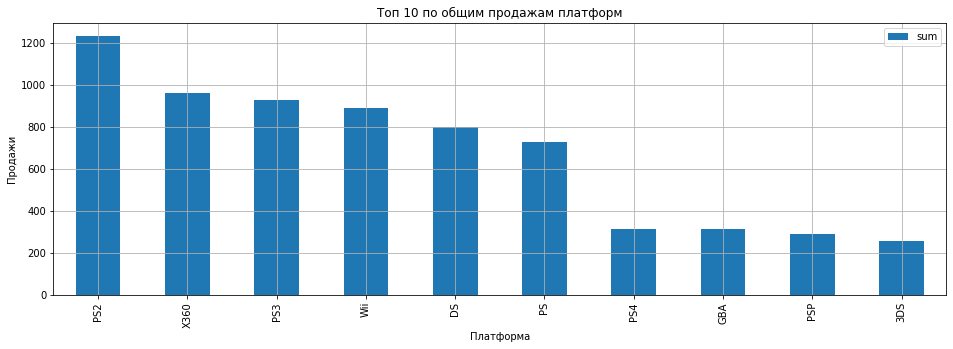

In [23]:
data.groupby('platform')['total_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head(10).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Топ 10 по общим продажам платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


Интересно отметить, что как и по колличеству выпущенных игр здесь лидирует PS2. А вот DS не смотря на большее колличество релизов по проданным копиям уступает сразу нескольким конкурентам: X360, PS3, Wii.

Что бы вычислить средний срок жизни игровой платформы рассмотрим отдельно несколько уже неактуальных на сегодняшний день.

In [24]:
data_ps2 = data.query('platform == "PS2"')

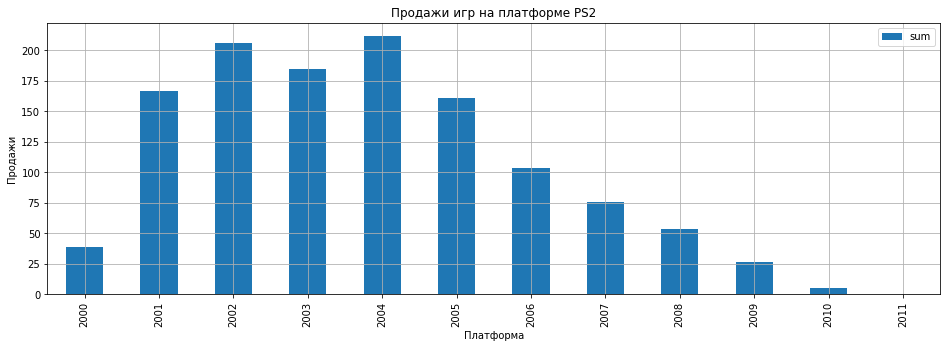

In [25]:
data_ps2.groupby('year_of_release')['total_sales'].agg({'sum'}).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Продажи игр на платформе PS2')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [26]:
data_x360 = data.query('platform == "X360"')

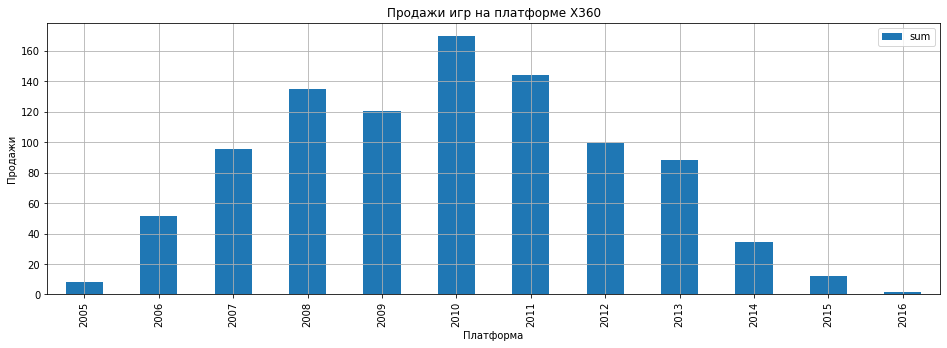

In [27]:
data_x360.groupby('year_of_release')['total_sales'].agg({'sum'}).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Продажи игр на платформе X360')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [28]:
data_ps3 = data.query('platform == "PS3"')

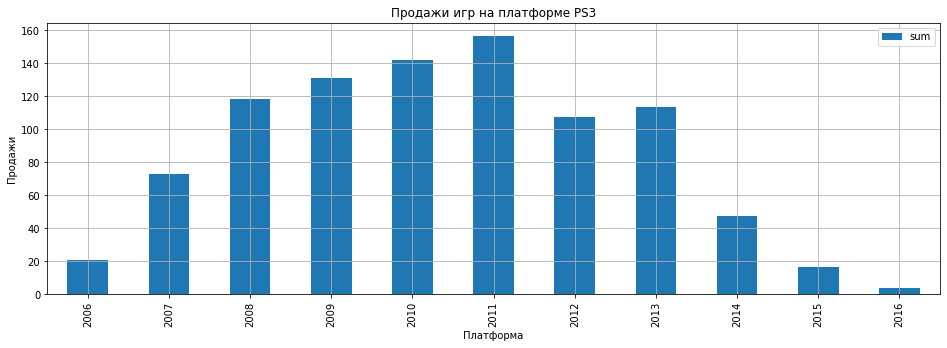

In [29]:
data_ps3.groupby('year_of_release')['total_sales'].agg({'sum'}).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Продажи игр на платформе PS3')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [30]:
data_ds = data.query('platform == "DS"')

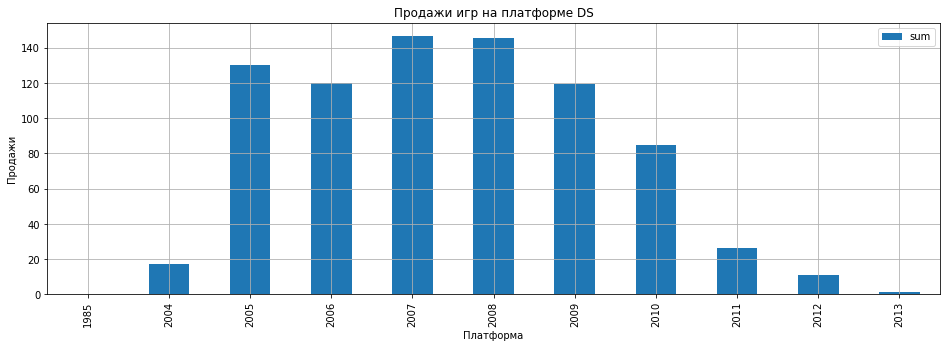

In [31]:
data_ds.groupby('year_of_release')['total_sales'].agg({'sum'}).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Продажи игр на платформе DS')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [32]:
data_wii = data.query('platform == "Wii"')

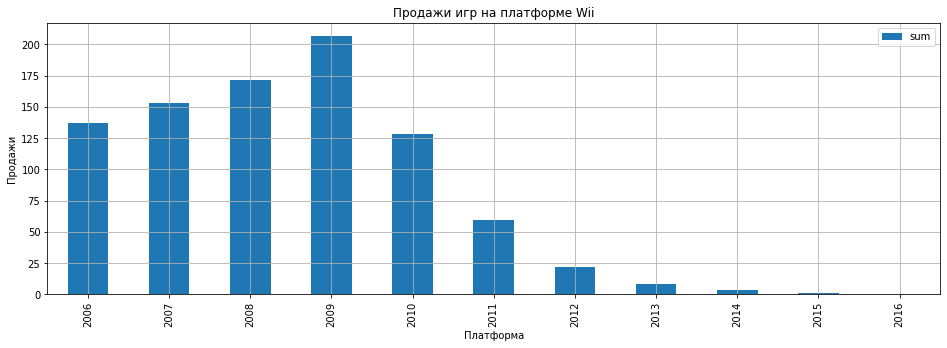

In [33]:
data_wii.groupby('year_of_release')['total_sales'].agg({'sum'}).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Продажи игр на платформе Wii')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

In [34]:
data_ps = data.query('platform == "PS"')

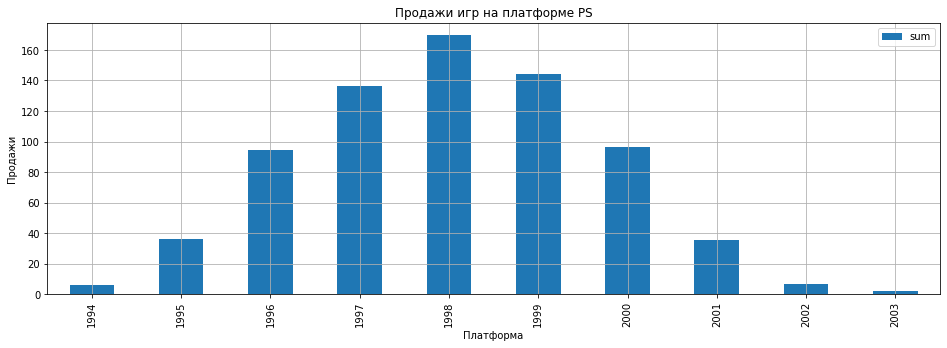

In [35]:
data_ps.groupby('year_of_release')['total_sales'].agg({'sum'}).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Продажи игр на платформе PS')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По таблицам можно сделать вывод, что с переменным успехом средний отрезок жизни платформы - 10 лет.

In [36]:
data = data.query('year_of_release >= 2014')# для построения прогноза отсечем не интересующие нас года

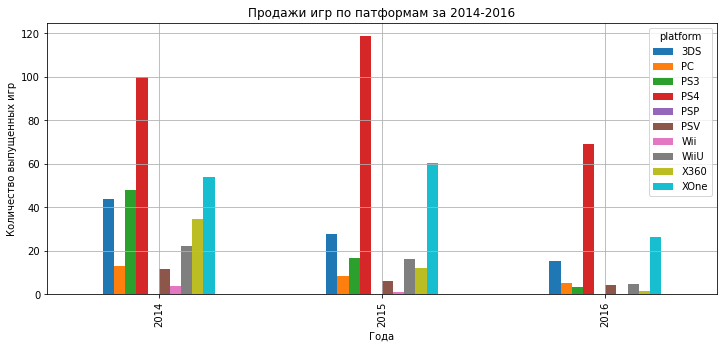

In [37]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12,5), kind = 'bar');
plt.title('Продажи игр по патформам за 2014-2016')
plt.xlabel('Года')
plt.ylabel('Количество выпущенных игр')
plt.show()

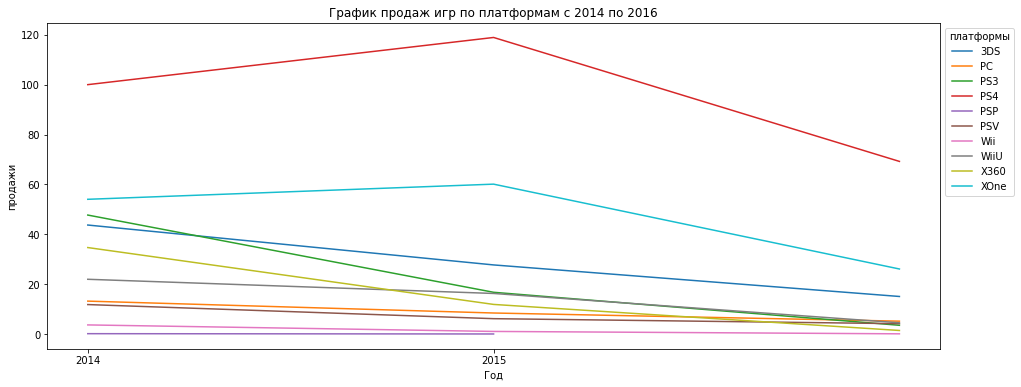

In [38]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,6), xticks=range(2014, 2016)).legend(title='платформы', bbox_to_anchor=(1, 1));
plt.title('График продаж игр по платформам с 2014 по 2016')
plt.xlabel('Год')
plt.ylabel('продажи')
plt.show()

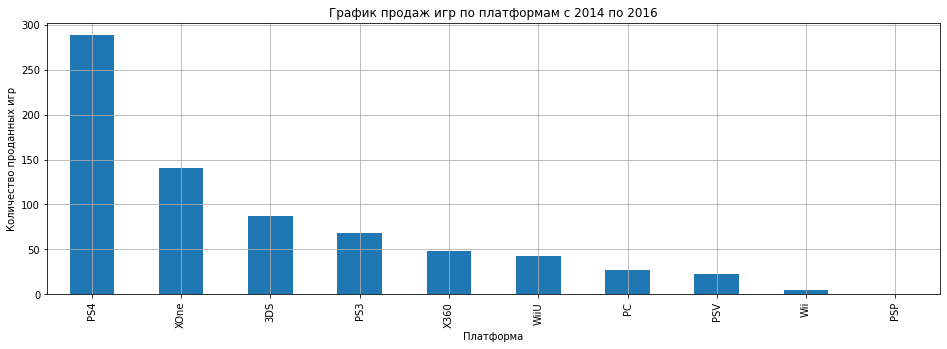

In [39]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('График продаж игр по платформам с 2014 по 2016')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр')
plt.show()


По графикам хорошо видно, что есть ярко выраженный лидер - PS4. С большим отрывом от него можно выделить еще 2 потенциально прибыльные платформы - XOne и 3DS. Но не будем забывать, что это данные по продажам во всем мире, а в нашем распоряжении есть более близкие к нашему рынку данные из Европы.

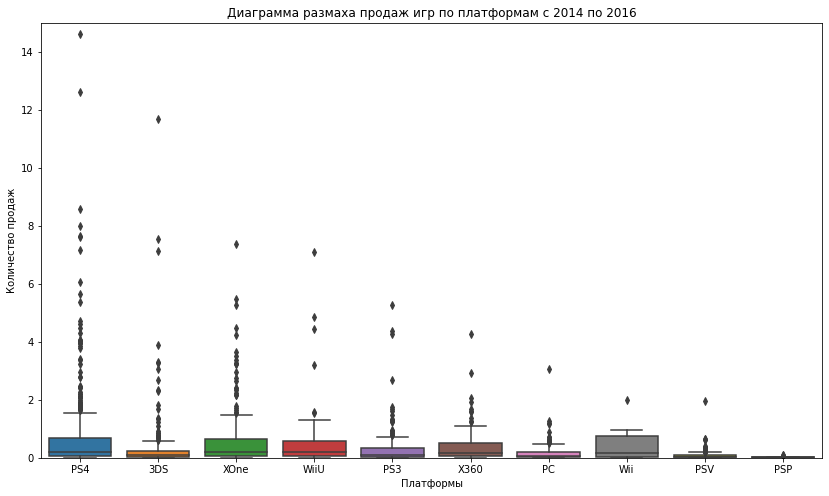

In [40]:
fig, ax = plt.subplots(figsize = (14,8))
sns.boxplot(x='platform',y='total_sales',data=data);
ax.set_ylim(0, 15)
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Диаграмма размаха продаж игр по платформам с 2014 по 2016');

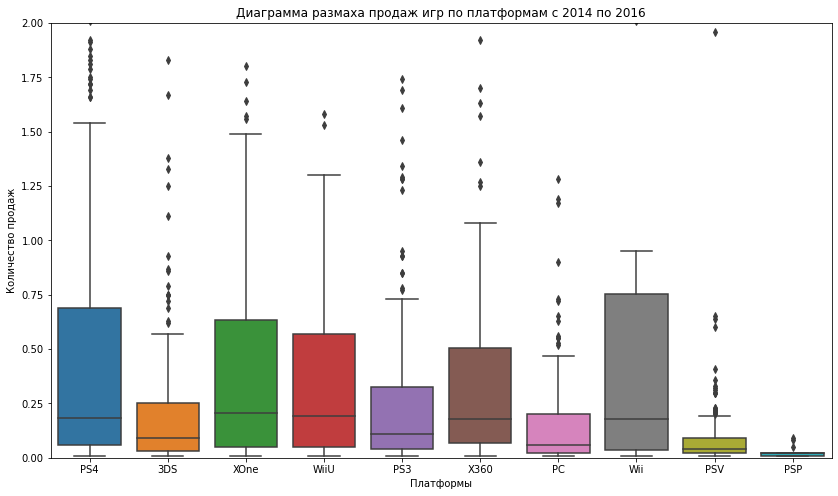

In [41]:
fig, ax = plt.subplots(figsize = (14,8))
sns.boxplot(x='platform',y='total_sales',data=data);
ax.set_ylim(0, 2)
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.title('Диаграмма размаха продаж игр по платформам с 2014 по 2016');

По диаграмме размаха  видно, что выбросы у PS4 встречаются чаще, также 75 процентиль у PS4 выше конкурентов, однако XOne и WiiU не сильно отстают.Меньше всего продаж на переносных консолях PSV и PSP.

In [42]:
data_ps4 = data.query('platform == "PS4" & user_score != 0')# отфильтруем данные по самой популярной платформе на данный момент 

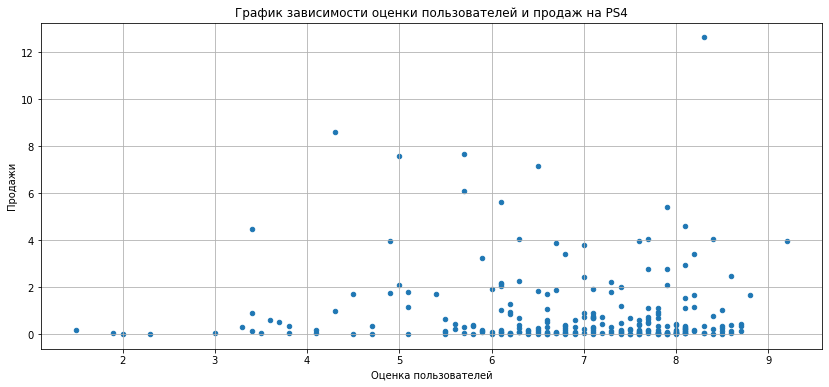

In [43]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(14, 6))
plt.title('График зависимости оценки пользователей и продаж на PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [44]:
data_ps4['user_score'].corr(data_ps4['total_sales'])# для наглядности добавим корреляцию Пирсона

-0.040131589472697356

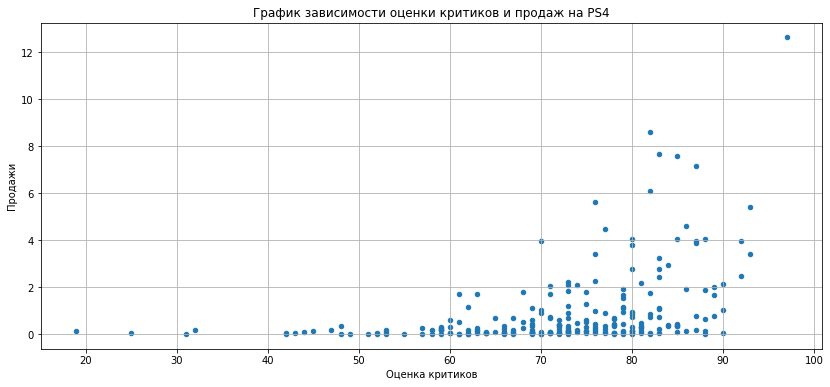

In [45]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(14, 6))
plt.title('График зависимости оценки критиков и продаж на PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [46]:
data_ps4['critic_score'].corr(data_ps4['total_sales'])# для наглядности добавим корреляцию Пирсона

0.40190287811475334

In [47]:
data_other = data.query('platform != "PS4" & user_score != 0')# отфильтруем данные по самой популярной платформе на данный момент 

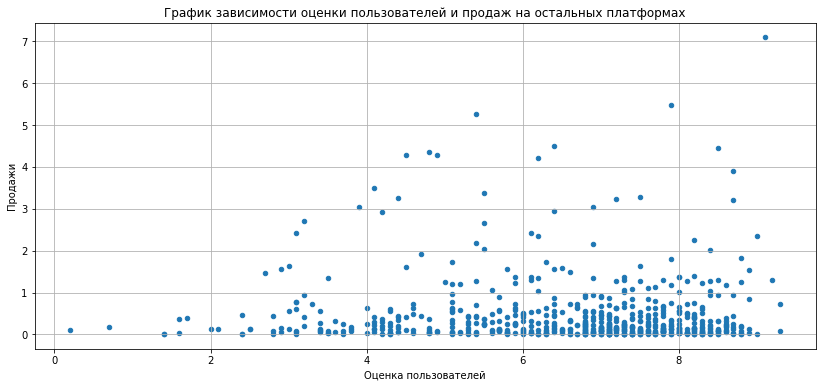

In [48]:
data_other.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(14, 6))
plt.title('График зависимости оценки пользователей и продаж на остальных платформах')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [49]:
data_other['user_score'].corr(data_other['total_sales'])# для наглядности добавим корреляцию Пирсона

-0.023478187237975554

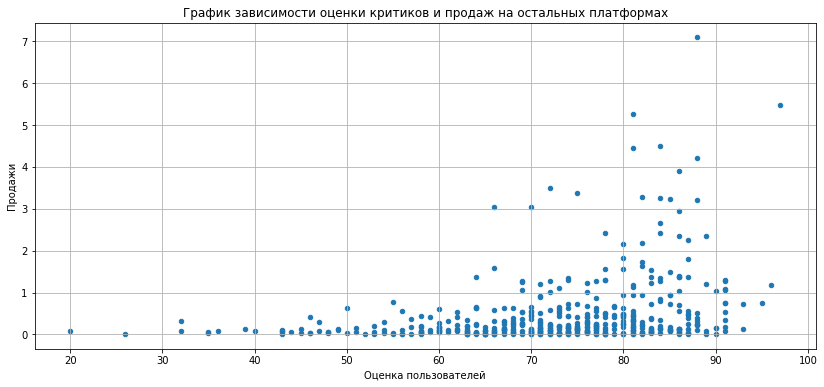

In [50]:
data_other.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(14, 6))
plt.title('График зависимости оценки критиков и продаж на остальных платформах')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [51]:
data_other['critic_score'].corr(data_other['total_sales'])# для наглядности добавим корреляцию Пирсона

0.3047894679009596

По графикам и корреляции можно сделать выводы, что в отличие от оценок обычных игроков - мнение и обзоры критиков имеют определенный вес. Хотя и не являются ключевым факторам при продажах. Несколько больше это сказывается при продажах на PS4, нежели на других платформах.

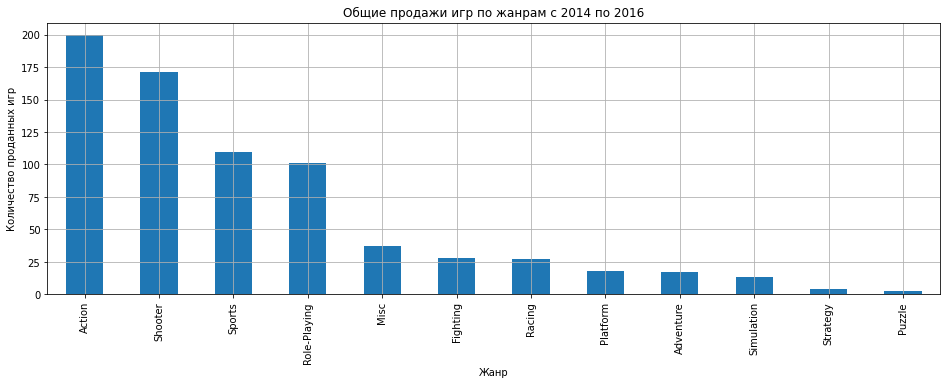

In [52]:
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Общие продажи игр по жанрам с 2014 по 2016')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр')
plt.show()

В жанрах можно выделить ТОП 4, лучше продаются: Action, Shoter, Sports, Role-Playing. Но нужно так же учитывать, что и выпущенных игр например в жанре Action в разы больше, чем например Misc или Racing.

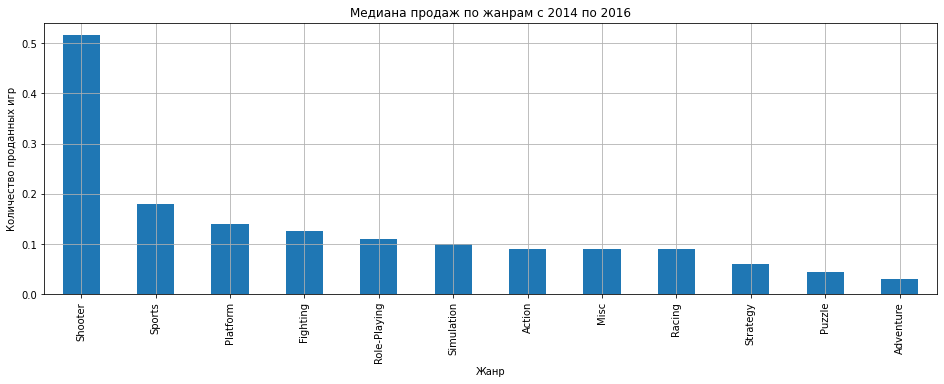

In [53]:
data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(grid=True, kind='bar', figsize=(16,5));
plt.title('Медиана продаж по жанрам с 2014 по 2016')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр')
plt.show()

Более объективно здесь посмотреть на медиальное значение. И тут мы видим совсем другую ситуацию. С огромным отрывом лидируют игры в жанре Shooter. У остальных жанров показатели отличаются уже не так сильно. А Action не вошел даже в ТОП-5.
Замыкают список Strategy, Puzzle и Adventure.

Наиболее востребованы 3 платформы:PS4, XOne, 3DS.
В жанрах лидирующие позиции занимают Shooter, Sports, Platform, Fighting и Role-Playing.

# Шаг 4

Посмотрим на регионы отдельно.

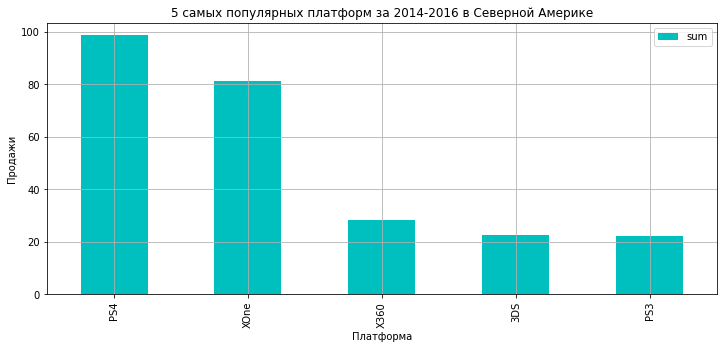

In [54]:
data_top_5_na = data.groupby('platform')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head()
data_top_5_na.plot(grid=True, figsize=(12,5), kind = 'bar', color = 'c')
plt.title('5 самых популярных платформ за 2014-2016 в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()# найдем 5 самых популярных платформ за 2014-2016 в Северной Америке

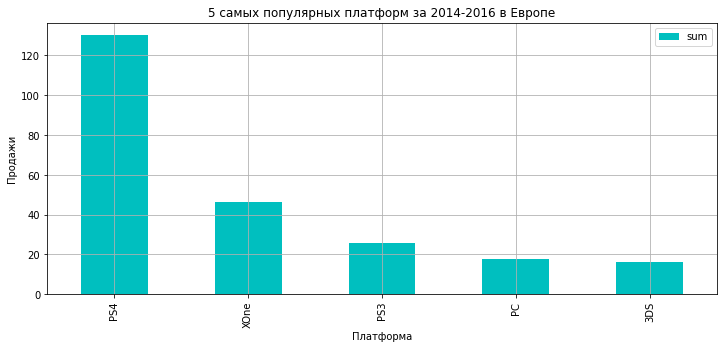

In [55]:
data_top_5_eu = data.groupby('platform')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head()
data_top_5_eu.plot(grid=True, figsize=(12,5), kind = 'bar', color = 'c')
plt.title('5 самых популярных платформ за 2014-2016 в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()# найдем 5 самых популярных платформ за 2014-2016 в Европе

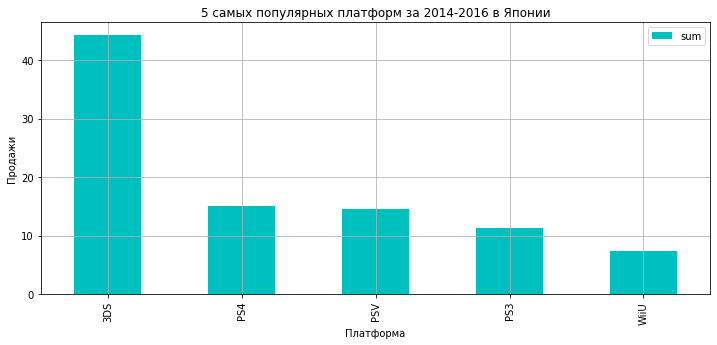

In [56]:
data_top_5_jp = data.groupby('platform')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head()
data_top_5_jp.plot(grid=True, figsize=(12,5), kind = 'bar', color = 'c')
plt.title('5 самых популярных платформ за 2014-2016 в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()# найдем 5 самых популярных платформ за 2014-2016 в Японии

Отличия продаж в разных регионах очень существенны. Если сравнивать Северную Америку и Европу, то главное отличие в доли рынка X-Box. Платформа XOne составляет достойную конкуренцию PS4, хотя и уступает ей даже на родном рынке.
А вот продажи в Япони на этом фоне стоят особняком! Японцы предпочитают карманные гаджеты. Продажи на платформе 3DS в 3!! раза превышают продажи игры на PS4. А еще одна платформа для карманных гаджетов PSV практически не уступает тому же PS4.
Видно, что и японцы и американсы стараются поддержать отечественного производителя)

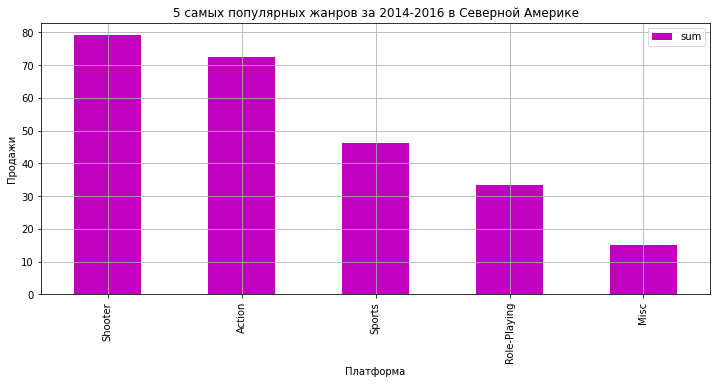

In [57]:
data_top_5_nag = data.groupby('genre')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head()
data_top_5_nag.plot(grid=True, figsize=(12,5), kind = 'bar', color = 'm')
plt.title('5 самых популярных жанров за 2014-2016 в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()# найдем 5 самых популярных жанров за 2014-2016 в Северной Америке

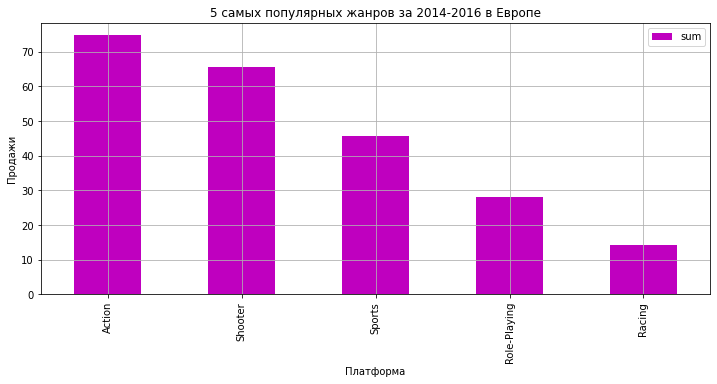

In [58]:
data_top_5_eug = data.groupby('genre')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head()
data_top_5_eug.plot(grid=True, figsize=(12,5), kind = 'bar', color = 'm')
plt.title('5 самых популярных жанров за 2014-2016 в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()# найдем 5 самых популярных жанров за 2014-2016 в Европе

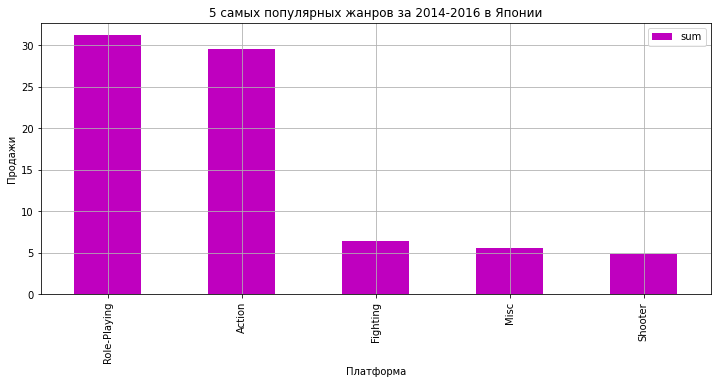

In [59]:
data_top_5_jpg = data.groupby('genre')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending = False).head()
data_top_5_jpg.plot(grid=True, figsize=(12,5), kind = 'bar', color = 'm')
plt.title('5 самых популярных жанров за 2014-2016 в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()# найдем 5 самых популярных жанров за 2014-2016 в Японии

В сравнении предпочтений по жанрам жителей Северной Америки и Европы показатели максимально схожи!
А в Японии как и в прошлых графиках отличия разительны. Объединяет всех любовь к жанру Action, он и в Японии хорошо продается.А вот Role-Playing значительно более востребован, в отличии от спортивных игр, которые даже не вошли в ТОП-5

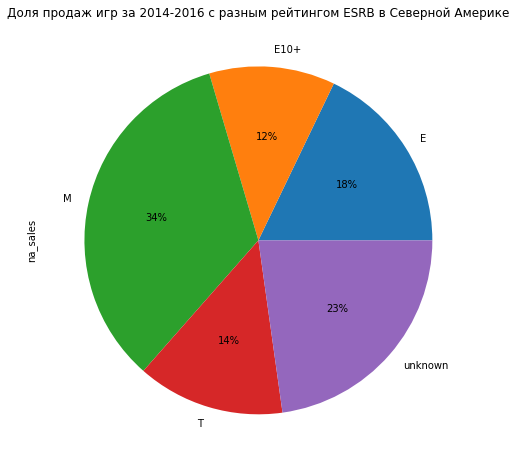

In [60]:
data.groupby('rating')['na_sales'].sum().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8));
plt.title('Доля продаж игр за 2014-2016 с разным рейтингом ESRB в Северной Америке')
plt.show()

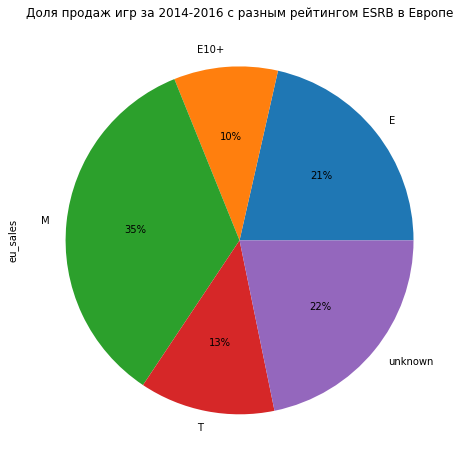

In [61]:
data.groupby('rating')['eu_sales'].sum().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8));
plt.title('Доля продаж игр за 2014-2016 с разным рейтингом ESRB в Европе')
plt.show()

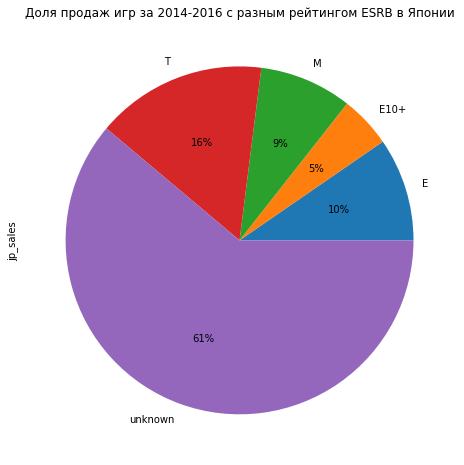

In [62]:
data.groupby('rating')['jp_sales'].sum().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8));
plt.title('Доля продаж игр за 2014-2016 с разным рейтингом ESRB в Японии')
plt.show()

В Европе и Северной америке больше всего покупают игры с рейтингом М(17+). И вообще статистика по рейтингам между двумя регионами максимально схожая.
В Японии у большинства игр этот рейтин выяснить не удалось.Из доступных данных можно увидеть, что преобладают игры с рейтингом T(Teen).

# Шаг 5

Проверим 2 гипотезы.

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Пользовательский рейтинг платформы "XOne" = Пользовательский рейтинг платформы "PC"

H_а: Пользовательский рейтинг платформы "XOne" ≠ Пользовательский рейтинг платформы "PC"

alpha = 0.05


2. Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Пользовательский рейтинг жанра "Action" = Пользовательский рейтинг жанра "Sports"

H_а: Пользовательский рейтинг жанра "Action" ≠ Пользовательский рейтинг жанра "Sports"

alpha = 0.05  Альфу возьмем 5%. На мой взгляд в пользовательском рейтинге это вполне допустимо.

Воспользуемся методом st.ttest_ind для сравнения равенства двух совокупностей.

In [63]:
results = st.ttest_ind(
    data[data['platform'] =='XOne']['user_score'] , 
    data[data['platform'] =='PC']['user_score'] ,
    equal_var = False)


alpha = 0.05




results.pvalue 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [64]:
results = st.ttest_ind(
    data[data['genre'] =='Action']['user_score'] , 
    data[data['genre'] =='Sports']['user_score'] ,
    equal_var = False)


alpha = 0.05




results.pvalue
if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


# Общий вывод.
Проанализировав данные можно сделать несколько выводов:

- Полный цикл жизни игровой платформы с момента зарождения до полного прекращения продаж около 10 лет.

- Игровой рынок Северной Америки и Европы сильно отличается от Японии. Как в предпочтении платформ, так и жанров.

- Самый продаваемый жанр с большим отрывом от конкурентов Shoter.

- Самой востребованной платформой в Европе с большим отрывом PS4. 

- Оценки критиков имеют небольшое влияние при продаже игр. Оценки пользователей вообще не влияют на продажи.

- В Северной америке и Европе более популярны игры с рейтингом М(17+). В Японии же преобладают игры с рейтингом T(Teen)

В предстоящем году лучше всего сконцентрировать основное свое внимание при продаже игр на несколько платформ : PS4, XOne, 3DS.Именно эти платформы лидируют в последние 2-3 года и на мировом и на Европейском рынке.Но основной акцент надо сделать на закупку и соответственно продажи игр на PS4, тк доля рынка этой платформы в Европе огромна. И именно на этой платформе выходит максимальное колличество бестселлеров.
В вопросе жанров лучше иметь максимальное колличество, чтоб обхватить как можно больше потенциальных покупателей, но основные акценты надо сделать на Shoter, Sports, Platform, Fighting, и Role-Playing.